# Analysis of the word classes in the answer, question and sentence containing answer

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# get the word class statistics for the root
def get_word_class_count(data, type):
    stats = {}
    for idx,ans in data.iterrows():
        word_pos = ans[type + '_root_pos']
        # can be none!
        if word_pos == None:
            print('word has None pos tag: ', ans[type + '_root_word'])
            if 'UNK' not in stats:
                stats['UNK'] = 1
            else:
                stats['UNK'] += 1
        elif word_pos not in stats:
            stats[word_pos] = 1
        else:
            stats[word_pos] += 1
    return stats

In [5]:
# print stats
def print_wordcount_stats(stats, title, ylabel):
    print('stats: ', stats)
    plt.bar(stats.keys(), stats.values(), color='teal')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [6]:
# load the data
path = '../data_frames/dependency_parsed_data/df_train_cleaned.pkl'
df = pd.read_pickle(path)

stats:  {'NOUN': 950, 'VERB': 326, 'NUM': 160, 'ADJ': 42, 'ADV': 7, 'PRON': 12, 'PROPN': 79, 'ADP': 1, 'DET': 2}


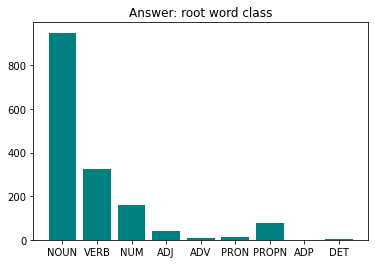

stats:  {'NOUN': 269, 'VERB': 1171, 'NUM': 3, 'AUX': 31, 'ADJ': 78, 'PROPN': 17, 'PRON': 5, 'ADV': 2, 'DET': 2, 'PUNCT': 1}


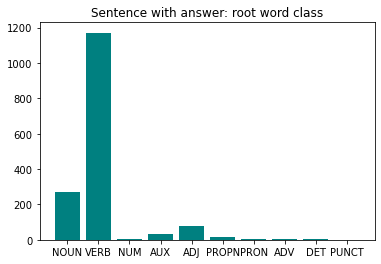

stats:  {'PRON': 141, 'VERB': 1194, 'NOUN': 155, 'ADJ': 74, 'ADV': 2, 'AUX': 7, 'NUM': 2, 'PROPN': 4}


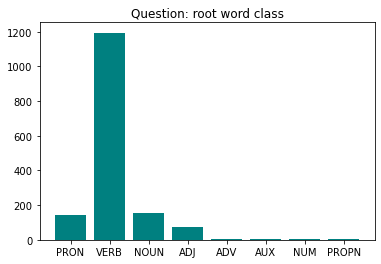

In [9]:
# PLOT STATISTICS

# ans stats
ans_stats = get_word_class_count(df, 'answer')
title_ans = 'Answer: root POS tag'
print_wordcount_stats(ans_stats, title_ans, 'Number of answers')

# ans sent stats
sent_stats = get_word_class_count(df, 'sent')
title_ans = 'Sentence with answer: root POS tag'
print_wordcount_stats(sent_stats, title_ans, 'Number of sentences')

# question stats
q_stats = get_word_class_count(df, 'q')
title_ans = 'Question: root POS tag'
print_wordcount_stats(q_stats, title_ans, 'Number of questions')
